<h1><a> EDA - TELECOMMUNICATION USER ANALYTICS </a></h1>

## Load dataset

In [1]:
# Libraries for data manipulation
import numpy as np
import pandas as pd

# Libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for settings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)

In [2]:
df = pd.read_excel('../data/xdr_telecom_data.xlsx')

In [3]:
df.shape

(150001, 55)

In [4]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset')

There are 150001 rows and 55 columns in the dataset


In [5]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
# columns'names
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

## Handle missing values

In [7]:
def percent_missing(df):
    total_cells = np.product(df.shape)
    total_missing = np.sum(df.isna().sum())
    print(f'There is {round((total_missing/total_cells)*100, 1)}% missing values')   

In [8]:
# percentage of missing values
percent_missing(df)

There is 12.5% missing values


In [9]:
df.isna().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [10]:
def drop_50percent_missing(df):
    for i in df.columns:
        if df[i].isna().sum() >= df.shape[0]/2:
            df.drop(labels=i, axis=1, inplace=True)
            print(f'Dropped column: {i}')

In [11]:
drop_50percent_missing(df)

Dropped column: TCP DL Retrans. Vol (Bytes)
Dropped column: TCP UL Retrans. Vol (Bytes)
Dropped column: HTTP DL (Bytes)
Dropped column: HTTP UL (Bytes)
Dropped column: Nb of sec with 125000B < Vol DL
Dropped column: Nb of sec with 1250B < Vol UL < 6250B
Dropped column: Nb of sec with 31250B < Vol DL < 125000B
Dropped column: Nb of sec with 37500B < Vol UL
Dropped column: Nb of sec with 6250B < Vol DL < 31250B
Dropped column: Nb of sec with 6250B < Vol UL < 37500B


In [12]:
df.shape

(150001, 45)

In [13]:
df.isna().sum()

Bearer Id                             0
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [14]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,42.0,5.0,23.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,1.321510e+09,undefined,undefined,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [15]:
# if the number is closer to zero, then the column is skewed

In [16]:
df_numeric = df.select_dtypes(include='float')

In [17]:
df_numeric.skew(axis=0, skipna=True)

Start ms                            0.000968
End ms                             -0.001163
Dur. (ms)                           3.952609
IMSI                               41.045956
MSISDN/Number                     332.155856
IMEI                                1.071470
Avg RTT DL (ms)                    62.907828
Avg RTT UL (ms)                    28.457415
Avg Bearer TP DL (kbps)             2.589437
Avg Bearer TP UL (kbps)             4.503413
DL TP < 50 Kbps (%)                -2.297803
50 Kbps < DL TP < 250 Kbps (%)      3.271453
250 Kbps < DL TP < 1 Mbps (%)       4.566158
DL TP > 1 Mbps (%)                  5.370351
UL TP < 10 Kbps (%)                -8.985016
10 Kbps < UL TP < 50 Kbps (%)      10.943888
50 Kbps < UL TP < 300 Kbps (%)     21.878495
UL TP > 300 Kbps (%)               36.174053
Activity Duration DL (ms)           5.872256
Activity Duration UL (ms)           7.382557
Dur. (ms).1                         3.952609
Nb of sec with Vol DL < 6250B       9.042166
Nb of sec 

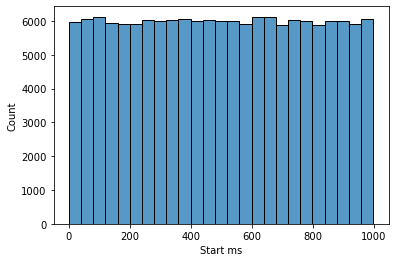

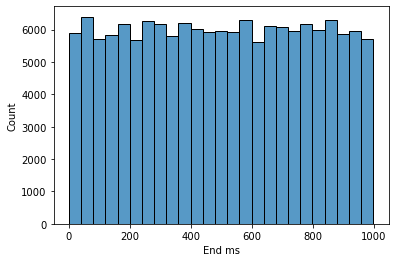

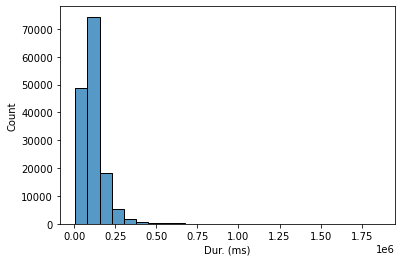

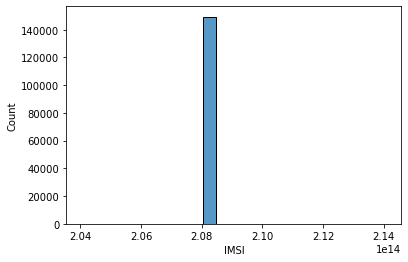

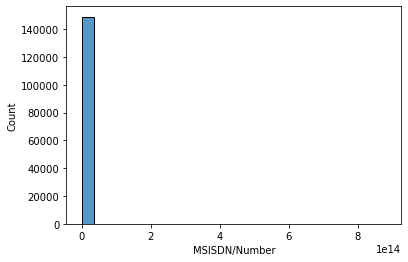

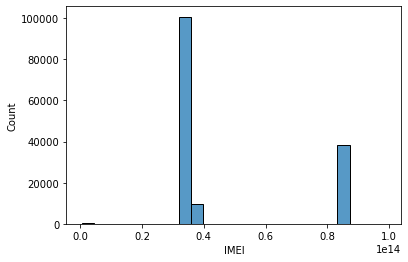

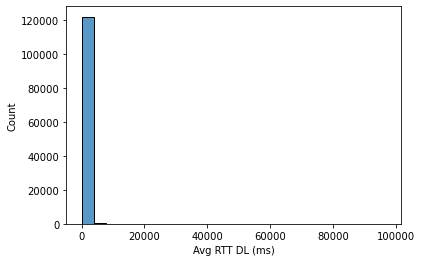

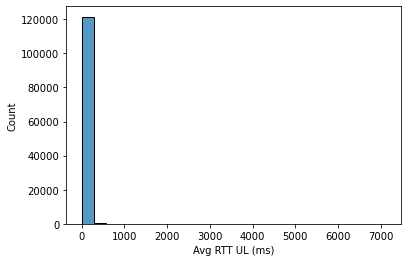

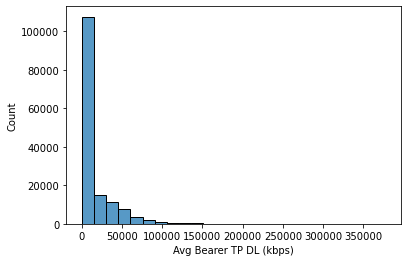

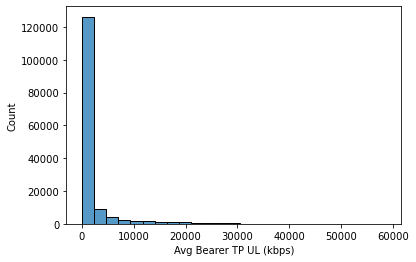

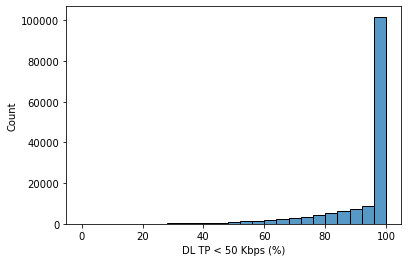

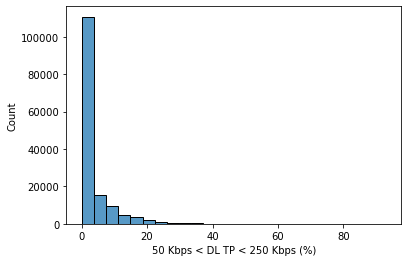

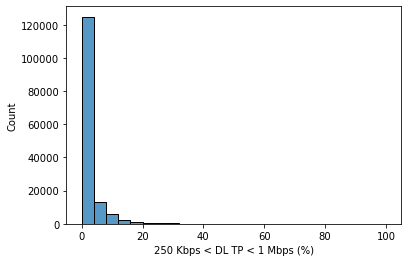

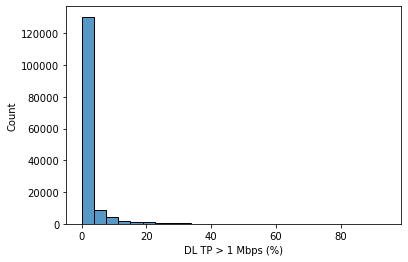

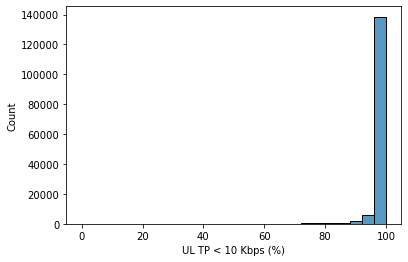

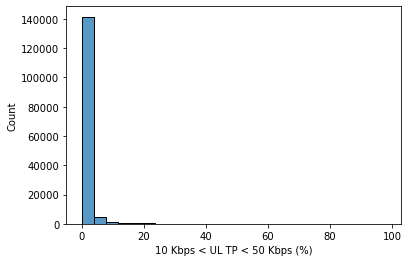

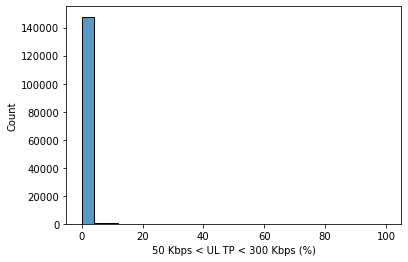

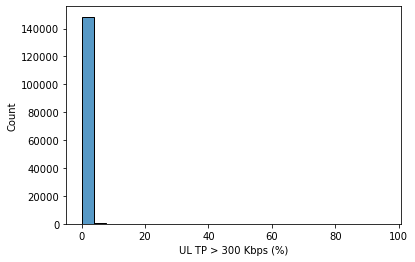

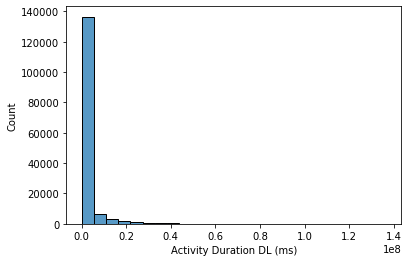

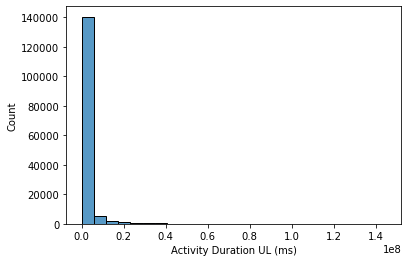

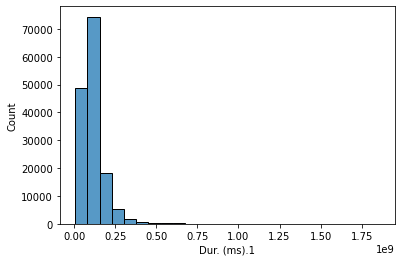

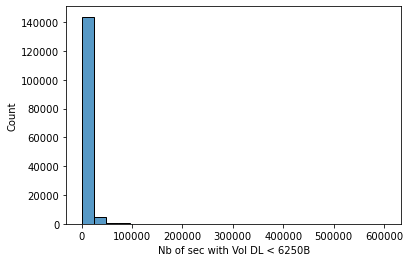

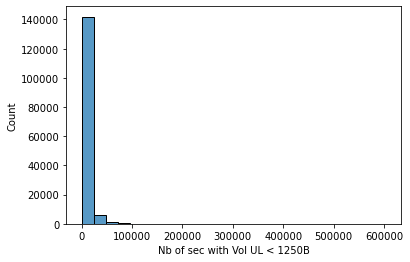

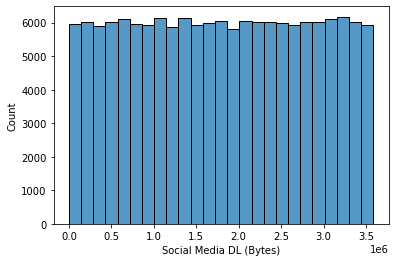

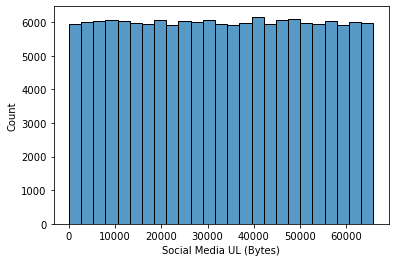

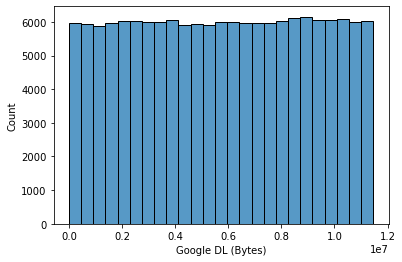

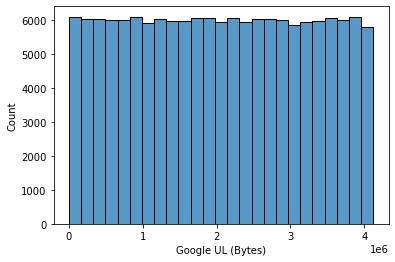

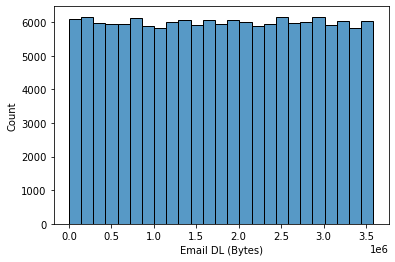

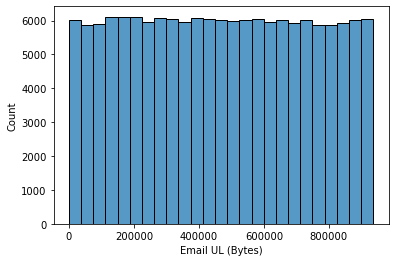

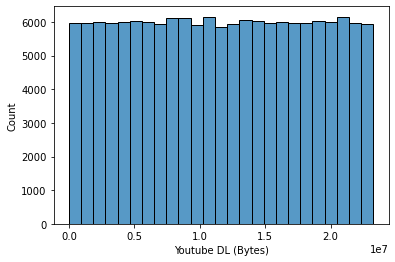

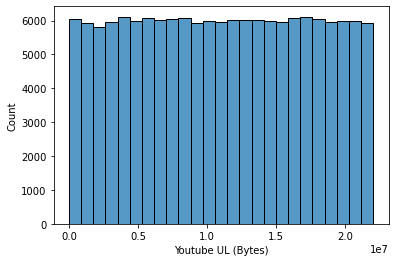

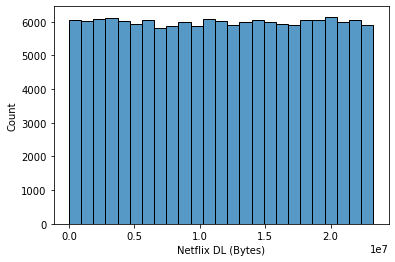

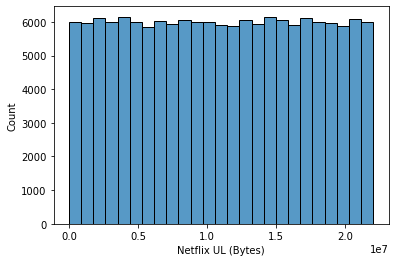

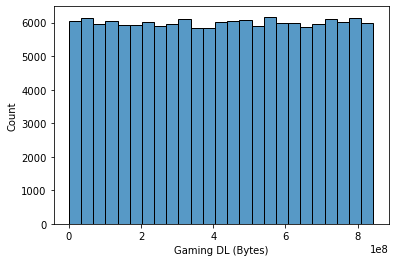

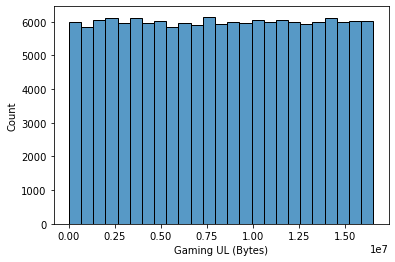

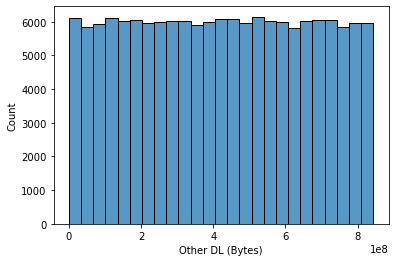

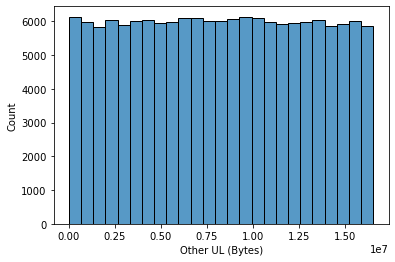

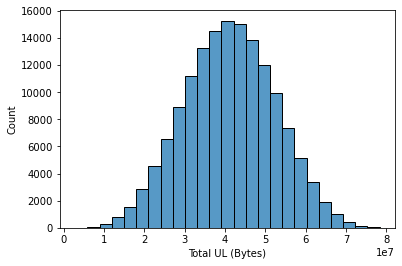

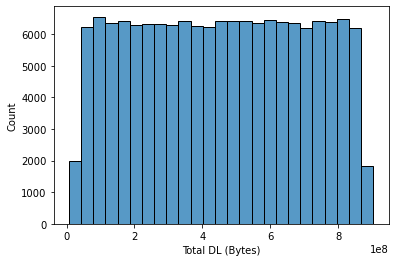

In [18]:
for i in df_numeric.columns:
    sns.histplot(data=df_numeric, x=df_numeric[i], bins=25)
    plt.show()

In [19]:
def fill_missing(df):
    df_numeric = df.select_dtypes(include='float')
    for i in df_numeric.columns:
        if df_numeric[i].skew() < 0.5 and df_numeric[i].skew() > -0.5:
            df[i].fillna(df[i].median(), inplace=True)
        else:
            df[i].fillna(df[i].mean(), inplace=True) 
    bfill_missing(df, 'Start')
    ffill_missing(df, 'End')

In [20]:
df.isna().sum()

Bearer Id                             0
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [21]:
def ffill_missing(df, col):
    df[col] = df[col].fillna(method='ffill')

def bfill_missing(df, col):
    df[col] = df[col].fillna(method='bfill')

In [22]:
bfill_missing(df, 'Start')

In [23]:
ffill_missing(df, 'End')

In [24]:
df.isna().sum()

Bearer Id                             0
Start                                 1
Start ms                              1
End                                   0
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [25]:
def show_outliers(df):
    df_numeric = df.select_dtypes(include='float')
    for i in df_numeric.columns:
        sns.boxplot(data=df_numeric, x=df_numeric[i])
        plt.show()

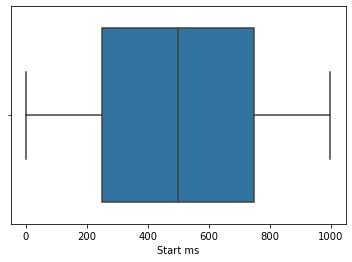

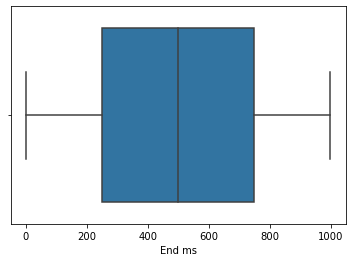

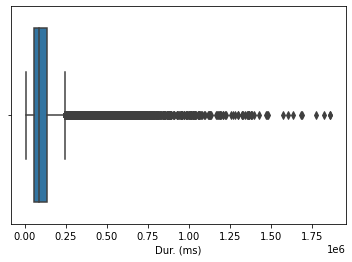

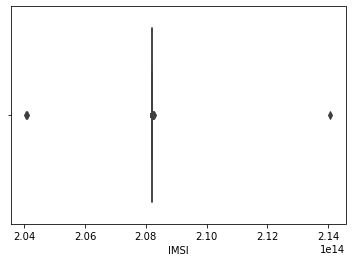

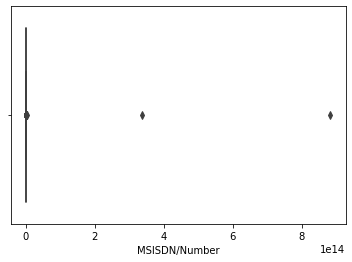

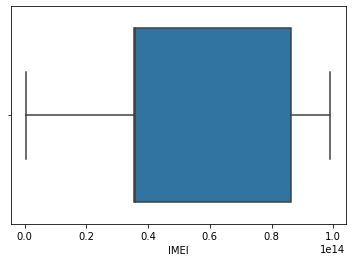

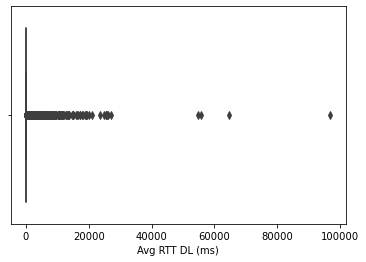

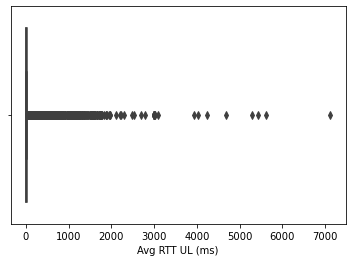

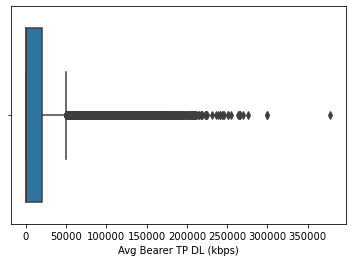

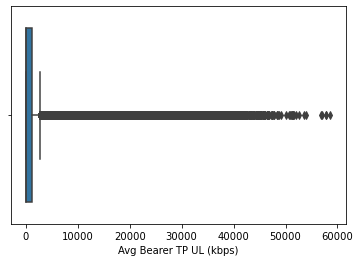

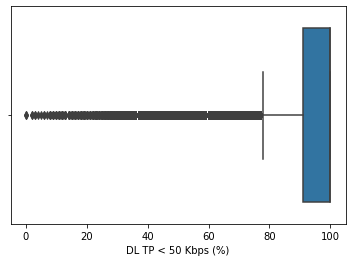

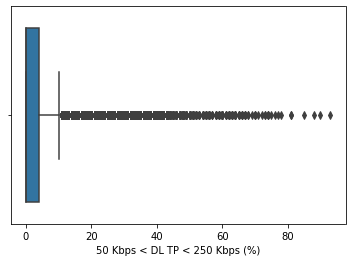

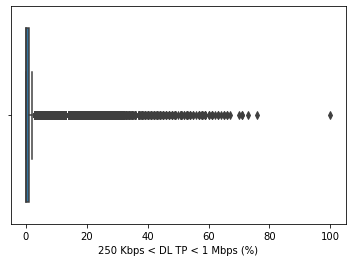

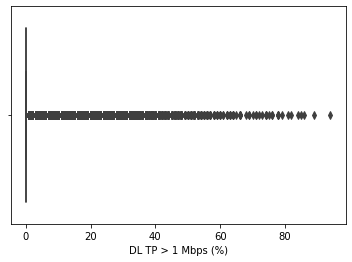

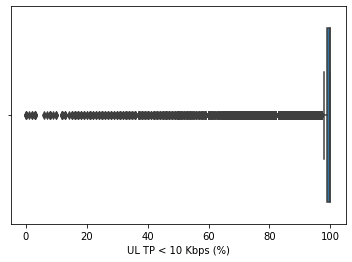

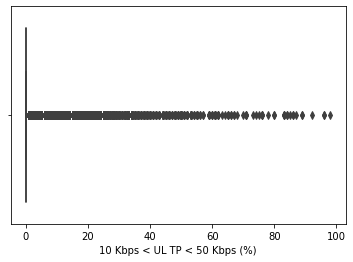

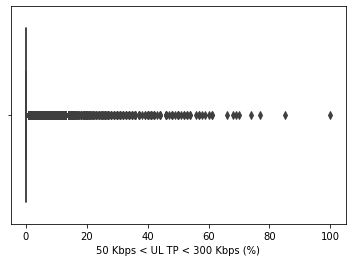

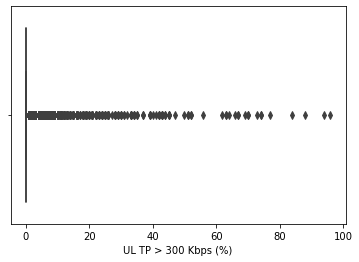

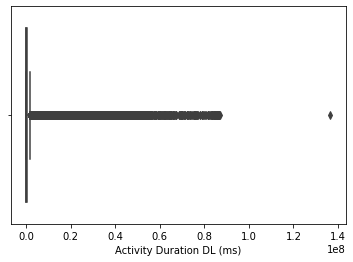

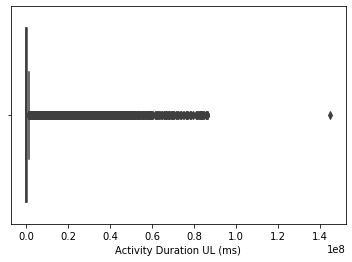

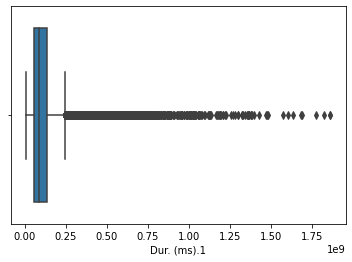

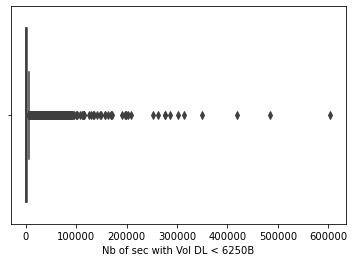

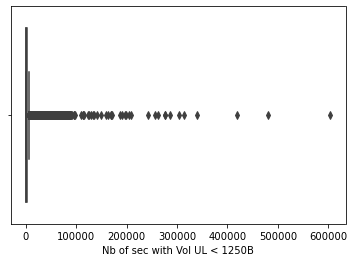

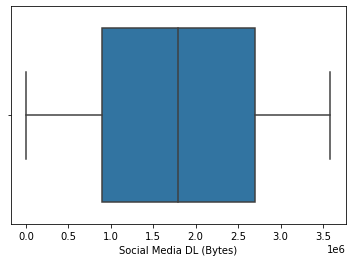

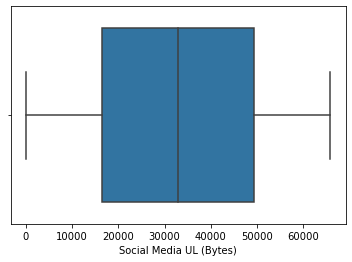

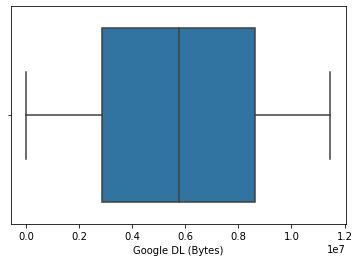

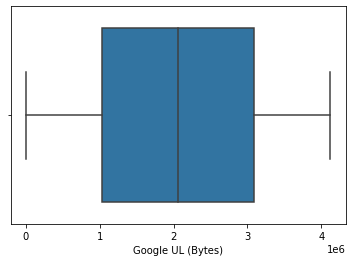

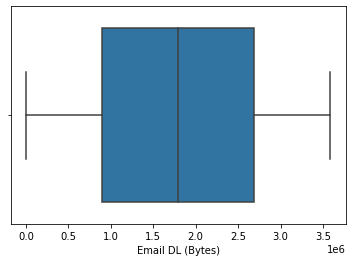

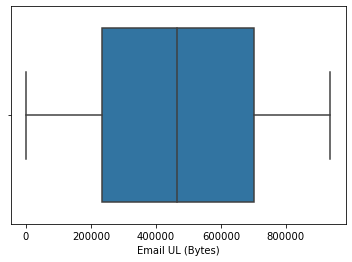

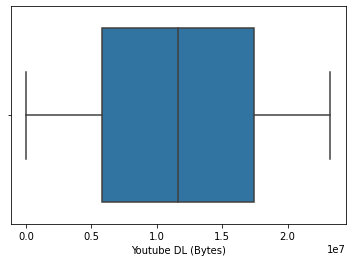

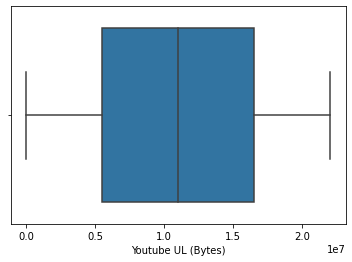

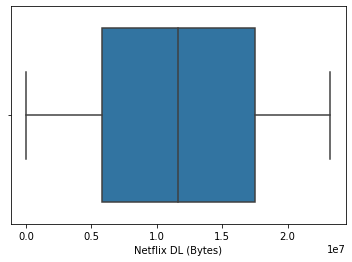

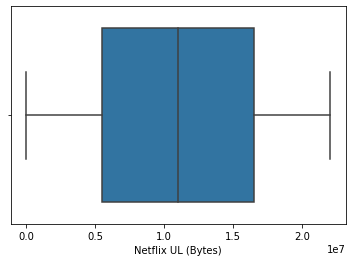

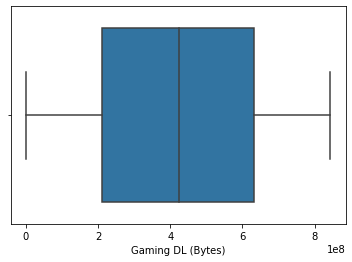

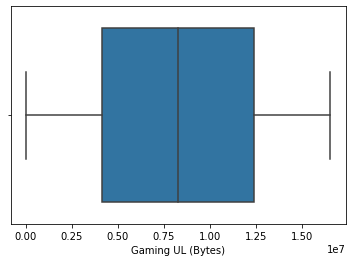

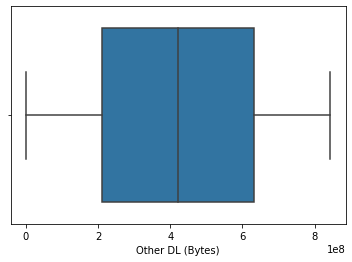

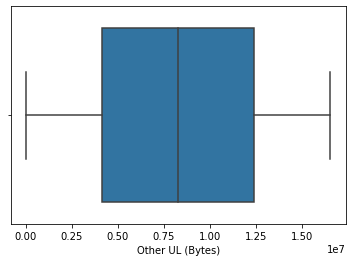

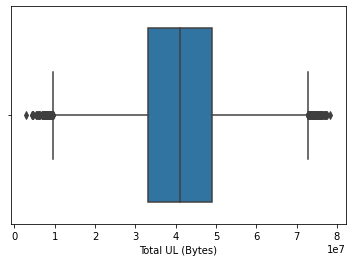

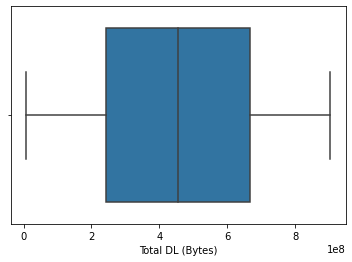

In [26]:
show_outliers(df)

In [27]:
def handle_outliers(df, col):
    df[col] = np.where(df[col].quantile(0.95), df[col].median, df[col])

In [28]:
outlier_cols = ['Dur. (ms)','IMSI','MSISDN/Number','Avg RTT DL (ms)','Avg RTT UL (ms)','Avg Bearer TP DL (kbps)',
               'Avg Bearer TP UL (kbps)','DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)','Dur. (ms).1','Total UL (Bytes)']

In [29]:
for i in outlier_cols:
    handle_outliers(df_numeric, i)

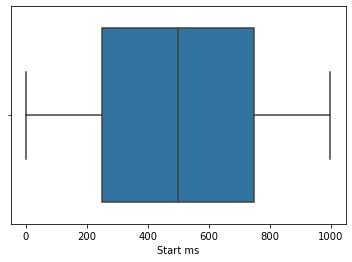

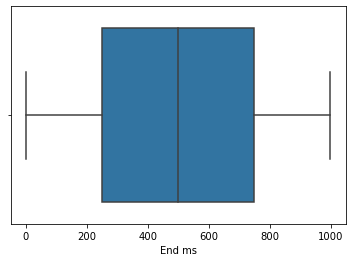

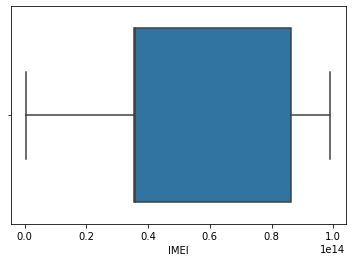

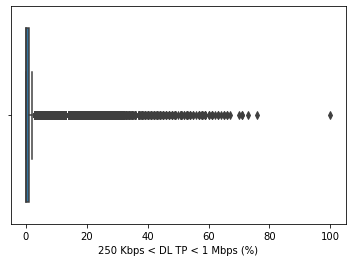

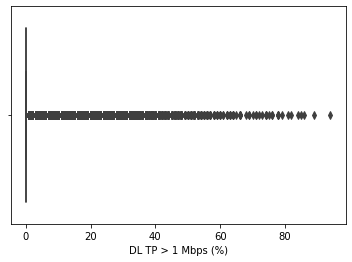

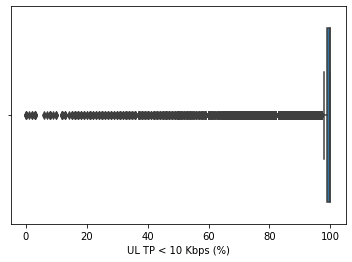

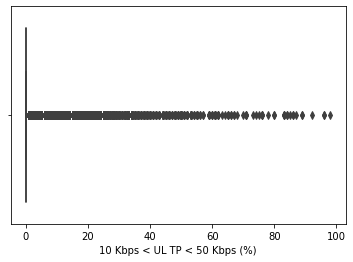

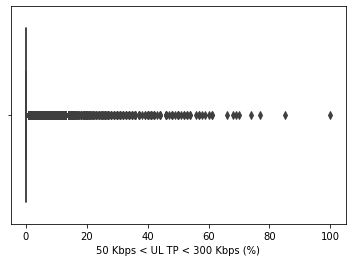

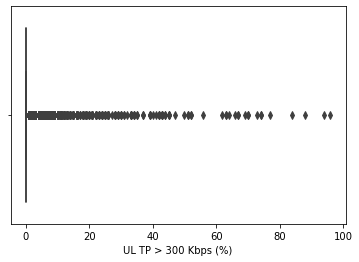

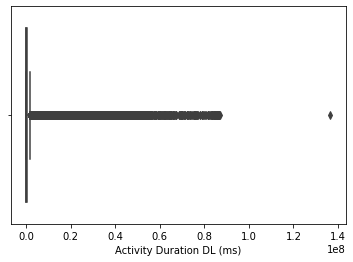

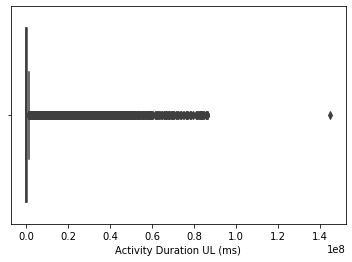

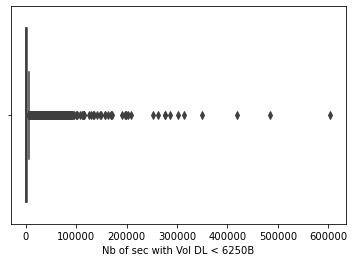

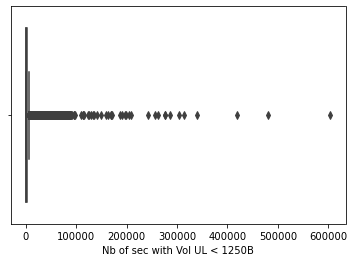

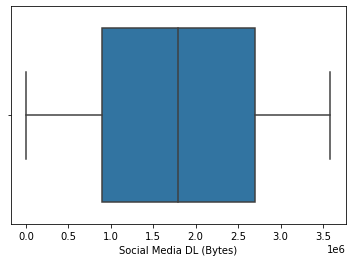

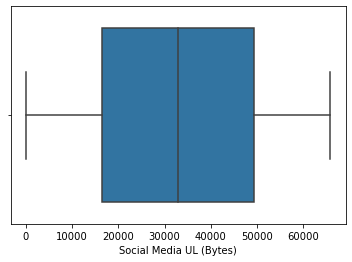

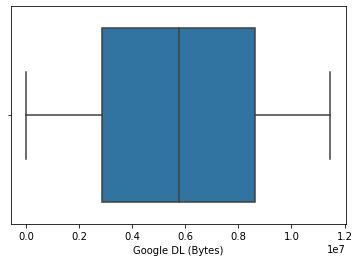

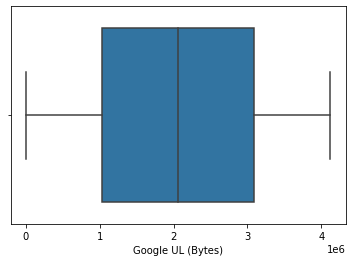

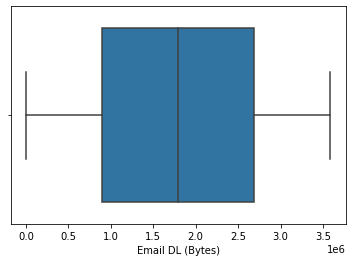

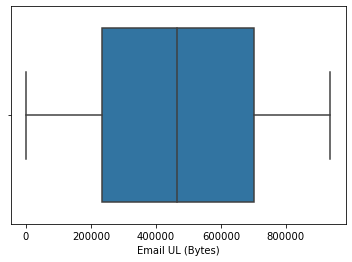

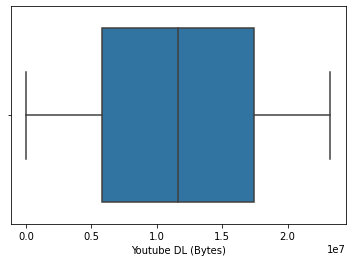

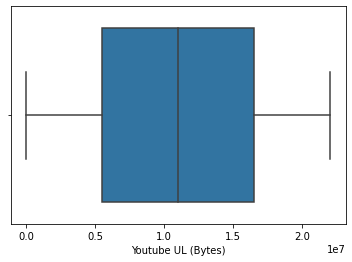

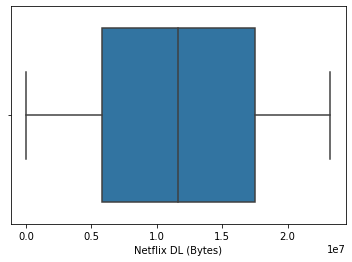

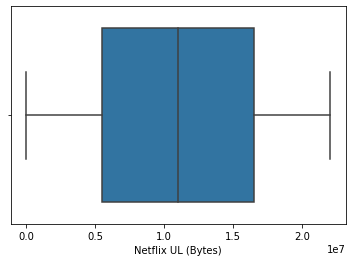

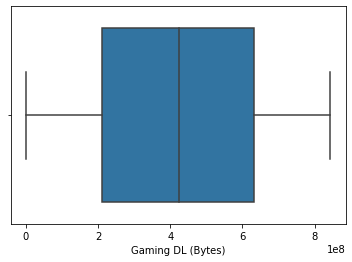

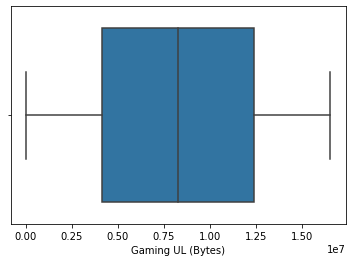

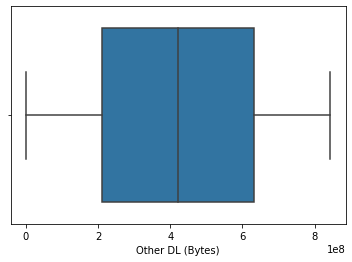

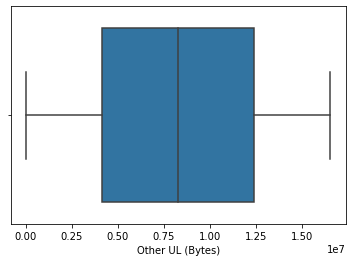

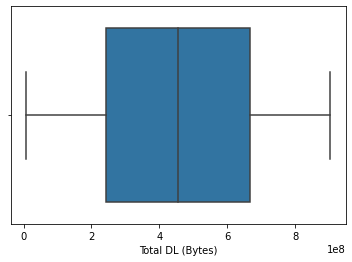

In [30]:
show_outliers(df_numeric)